In [6]:
import os
import shutil
import scipy
from scipy import stats
from skimage.io import imread, imsave
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time
import pandas as pd
import pickle
import pywt
from skimage.feature import hog,hessian_matrix, hessian_matrix_eigvals
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt,gaussian,laplace
# from scipy.ndimage import filters

In [23]:
def get_clean_binary_image(input_bin_image):
    import cv2

    # Load the noisy binary image
    noisy_binary_image = (input_bin_image).astype(np.float32)

    # Step 1: Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(noisy_binary_image, (1, 1), 2)

    # Step 2: Perform morphological operations to remove noise and fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    cleaned_image = cv2.morphologyEx(blurred_image, cv2.MORPH_CLOSE, kernel)

    # Step 3: Find contours and filter out small contours (noise)
    contours, _ = cv2.findContours(cleaned_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours based on contour area
    min_contour_area = 20 #tried 12  # Adjust this threshold as needed
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]
    cleaned_binary_image_ = np.zeros_like(cleaned_image)
    cv2.drawContours(cleaned_binary_image_, filtered_contours, -1, 255, thickness=cv2.FILLED)
    return cleaned_binary_image_

def extract_features(image_path):
    df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
    #Reset dataframe to blank after each loop.
    
    input_rgb = cv2.imread(image_path)  #Read images
    image_lab = cv2.cvtColor(input_rgb, cv2.COLOR_BGR2LAB)
    image_L_inverted = (255-image_lab[:,:,0])/255.0
 
    pixel_values = image_L_inverted.reshape(-1)          #uncomment for pixel inclusion
    df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature  ###uncomment for pixel inclusion


    sigma1 = 1.0
    sigma2 = 3.0
    threshold=0.03
    
    gaussian1 = gaussian(image_L_inverted, sigma=sigma1)
    gaussian2 = gaussian(image_L_inverted, sigma=sigma2)
    dog = gaussian1 - gaussian2
    binary_mask=(dog > threshold)*1
    clean_binary_image = get_clean_binary_image(binary_mask)
    masked_output = cv2.bitwise_and(image_L_inverted, image_L_inverted, mask=clean_binary_image.astype(np.uint8))
    df['dog feature'] = masked_output.reshape(-1)
    
                          
    
#     normalized_df = df.apply(lambda x: x / np.linalg.norm(x))
    return df


In [24]:
image_dataset = pd.DataFrame()  #Dataframe to capture image features
img_path = "/data/Devel_Human/Images/"

for imagefile in os.listdir(img_path):  #iterate through each file 
    print(imagefile)
    img_df = extract_features(img_path + imagefile)
    image_dataset = image_dataset.append(img_df)

14731.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15340.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14882.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15185.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14883.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15187.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15036.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15189.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14729.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14730.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15212.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15035.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14885.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14733.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14884.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15037.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14881.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15033.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15186.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15213.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15338.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14732.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15034.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15215.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14880.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15214.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15337.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15184.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15188.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15336.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15032.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


15339.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


14728.jpg


/tmp/ipykernel_14062/2069241388.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(img_df)


In [25]:
from sklearn.mixture import GaussianMixture
# Instantiate the GMM model
model = GaussianMixture(n_components=3, covariance_type='full',max_iter=4500, random_state=42) ###maxiter=500 for gray

model.fit(image_dataset)

GaussianMixture(max_iter=4500, n_components=3, random_state=42)

In [26]:
import matplotlib.pyplot as plt

def show_images_side_by_side(img_id,image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].imshow(image1)
    axes[0].axis('off')
    
    axes[1].imshow(image2)
    axes[1].axis('off')

    plt.tight_layout()
    plt.title(img_id)
    plt.show()


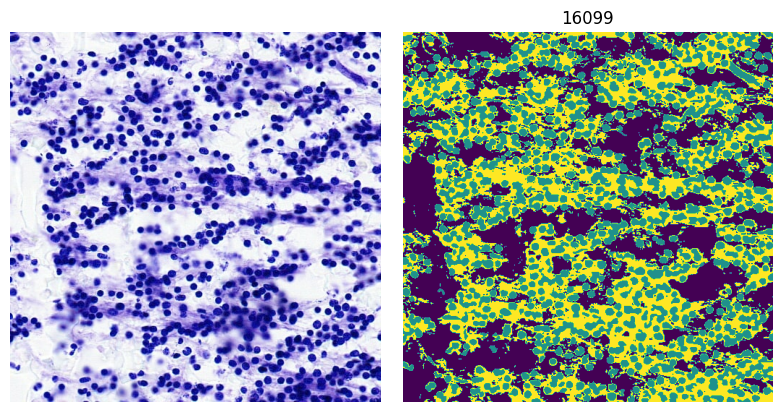

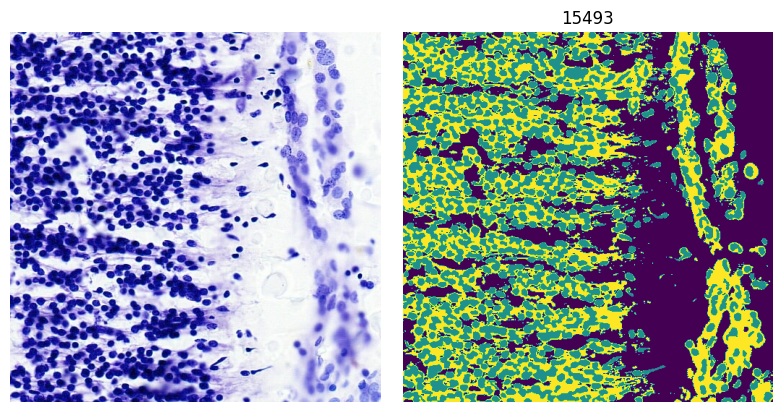

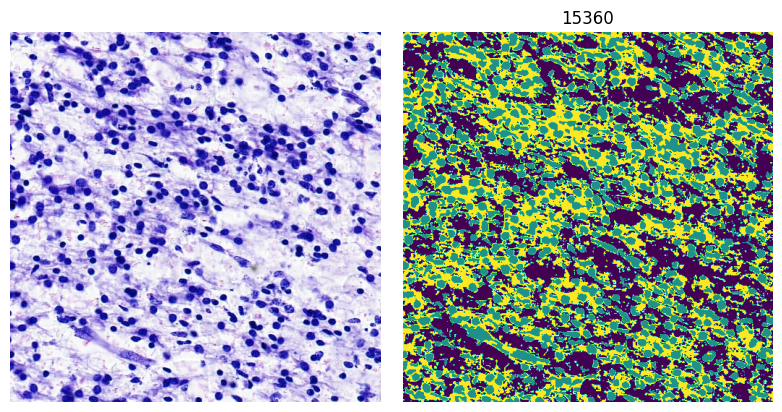

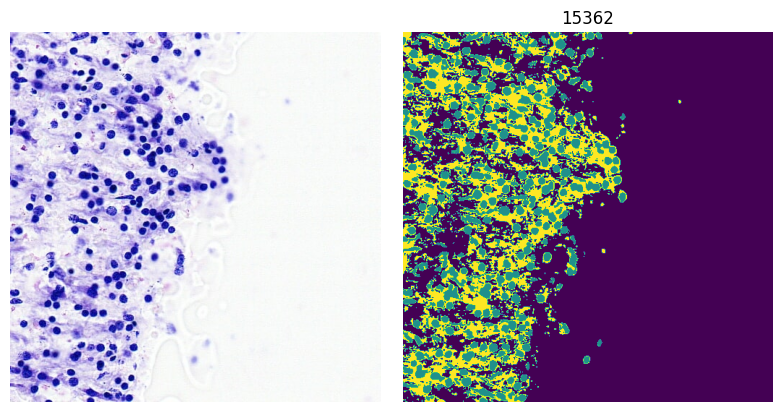

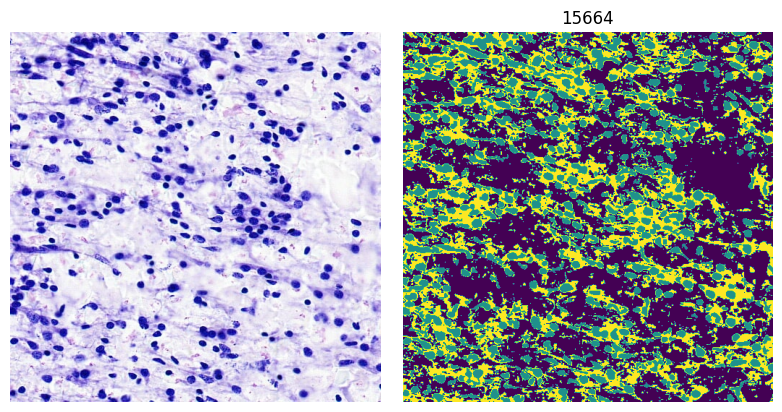

In [27]:
import glob
for img_path in glob.glob('/data/samplefb10/*.jpg'):
    img_id = img_path.split('/')[-1][:-4]
    X = extract_features(img_path)
    result = model.predict(X)
    segmented = result.reshape((512,512))
    show_images_side_by_side(img_id,imread(img_path), segmented)

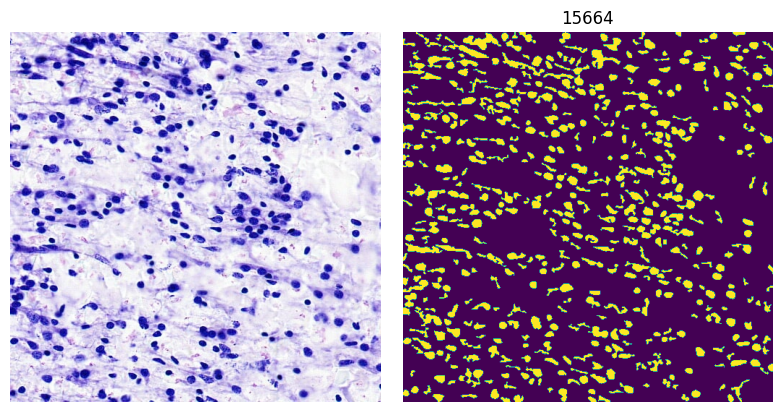

In [28]:
show_images_side_by_side(img_id,imread(img_path), segmented==1)

In [29]:
model_name = "gmm_model2_lab_dog_scheme.pkl"
with open(model_name, 'wb') as file:
    pickle.dump(model, file)